# HW Unsupervised Supervised Learning 

### Agi Rahmawandi <br> Batch 57

## Airline Customer Value Analysis Case

### Dataset ini berisi data customer sebuah perusahaan penerbangan dan beberapa fitur yang dapat menggambarkan value dari customer tersebut


https://www.kaggle.com/code/mustiadizaki/airline-customer-value-analysis-case

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import matplotlib.pyplot as plt


In [47]:
df = pd.read_csv('dataset/flight.csv')

In [21]:
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [49]:
df["FIRST_FLIGHT_DATE"] = pd.to_datetime(df["FIRST_FLIGHT_DATE"], errors="coerce")
df["LAST_FLIGHT_DATE"] = pd.to_datetime(df["LAST_FLIGHT_DATE"], errors="coerce")
df["LOAD_TIME"] = pd.to_datetime(df["LOAD_TIME"], errors="coerce")

# Melihat tanggal paling lama dan terbaru dari setiap kolom
print("FIRST_FLIGHT_DATE:", df["FIRST_FLIGHT_DATE"].min(), "→", df["FIRST_FLIGHT_DATE"].max())
print("LAST_FLIGHT_DATE:", df["LAST_FLIGHT_DATE"].min(), "→", df["LAST_FLIGHT_DATE"].max())
print("LOAD_TIME:", df["LOAD_TIME"].min(), "→", df["LOAD_TIME"].max())

FIRST_FLIGHT_DATE: 1905-12-31 00:00:00 → 2015-05-30 00:00:00
LAST_FLIGHT_DATE: 2012-04-01 00:00:00 → 2014-03-31 00:00:00
LOAD_TIME: 2014-03-31 00:00:00 → 2014-03-31 00:00:00


In [51]:
# Hitung Recency, Frequency, Monetary
df["Recency"] = (df["LOAD_TIME"] - df["LAST_FLIGHT_DATE"]).dt.days
df["Frequency"] = df["FLIGHT_COUNT"]
df["Monetary"] = df["SUM_YR_1"].fillna(0) + df["SUM_YR_2"].fillna(0)


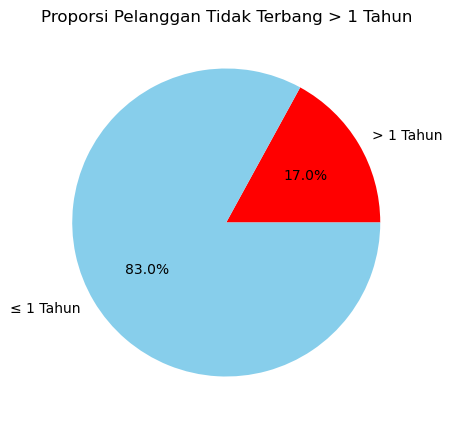

In [55]:
# 2. Proporsi pelanggan yang tidak terbang > 1 tahun
# ------------------------------
plt.figure(figsize=(5,5))
inactive_prop = (df["Recency"] > 365).mean()
plt.pie([inactive_prop, 1-inactive_prop],
        labels=["> 1 Tahun", "≤ 1 Tahun"],
        autopct='%1.1f%%', colors=["red", "skyblue"])
plt.title("Proporsi Pelanggan Tidak Terbang > 1 Tahun")
plt.show()

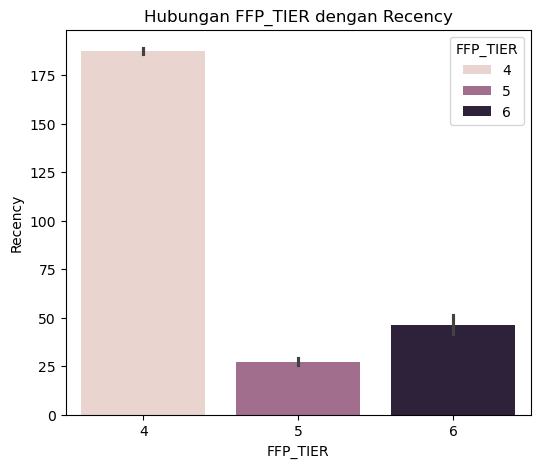

In [62]:
# 3. Hubungan antara FFP_TIER dan Recency
# ------------------------------
plt.figure(figsize=(6,5))
sns.barplot(data=df, x="FFP_TIER", y="Recency", hue='FFP_TIER')
plt.title("Hubungan FFP_TIER dengan Recency")
plt.show()

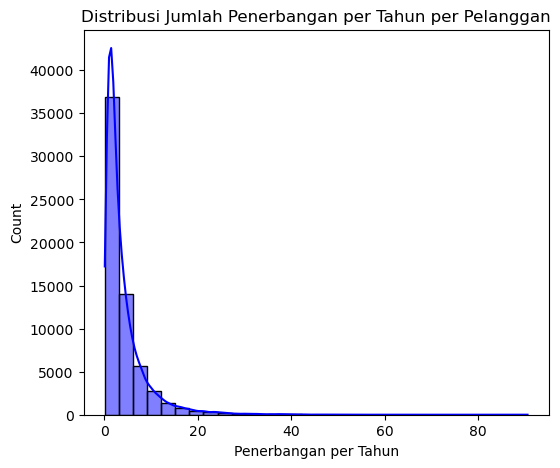

In [67]:
# 4. Rata-rata Frequency per Tahun
#    (asumsi dihitung dari durasi sejak penerbangan pertama)
# ------------------------------
df["Membership_Years"] = ((df["LOAD_TIME"] - df["FIRST_FLIGHT_DATE"]).dt.days / 365).clip(lower=1)
df["Flights_per_Year"] = df["Frequency"] / df["Membership_Years"]

plt.figure(figsize=(6,5))
sns.histplot(df["Flights_per_Year"], bins=30, kde=True, color="blue")
plt.title("Distribusi Jumlah Penerbangan per Tahun per Pelanggan")
plt.xlabel("Penerbangan per Tahun")
plt.show()

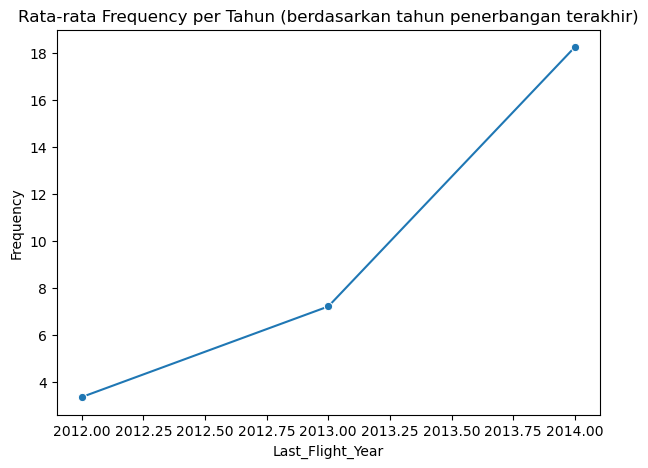

In [68]:
# ------------------------------
# 5. Pola penurunan Frequency dari tahun ke tahun
# ------------------------------
df["Last_Flight_Year"] = df["LAST_FLIGHT_DATE"].dt.year
freq_trend = df.groupby("Last_Flight_Year")["Frequency"].mean().reset_index()

plt.figure(figsize=(7,5))
sns.lineplot(data=freq_trend, x="Last_Flight_Year", y="Frequency", marker="o")
plt.title("Rata-rata Frequency per Tahun (berdasarkan tahun penerbangan terakhir)")
plt.show()

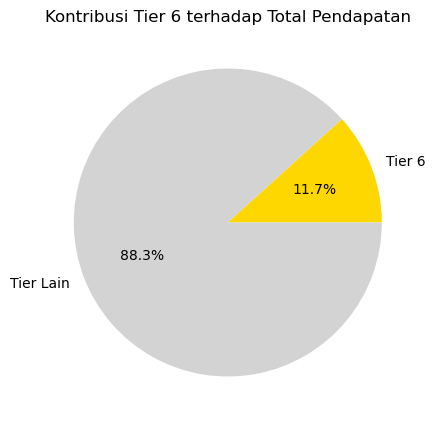

In [69]:
# 6. Kontribusi pelanggan tier tertinggi ke total pendapatan
# ------------------------------
tier_max = df["FFP_TIER"].max()
revenue_by_tier = df.groupby("FFP_TIER")["Monetary"].sum().reset_index()
tier_max_revenue = revenue_by_tier[revenue_by_tier["FFP_TIER"] == tier_max]["Monetary"].values[0]
total_revenue = revenue_by_tier["Monetary"].sum()

plt.figure(figsize=(5,5))
plt.pie([tier_max_revenue, total_revenue - tier_max_revenue],
        labels=[f"Tier {tier_max}", "Tier Lain"],
        autopct='%1.1f%%', colors=["gold", "lightgray"])
plt.title(f"Kontribusi Tier {tier_max} terhadap Total Pendapatan")
plt.show()

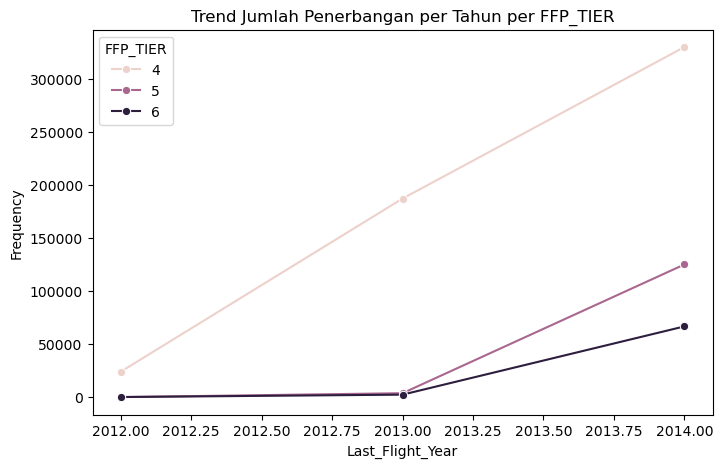

In [70]:
flights_tier_year = df.groupby(["Last_Flight_Year", "FFP_TIER"])["Frequency"].sum().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=flights_tier_year, x="Last_Flight_Year", y="Frequency", hue="FFP_TIER", marker="o")
plt.title("Trend Jumlah Penerbangan per Tahun per FFP_TIER")
plt.show()


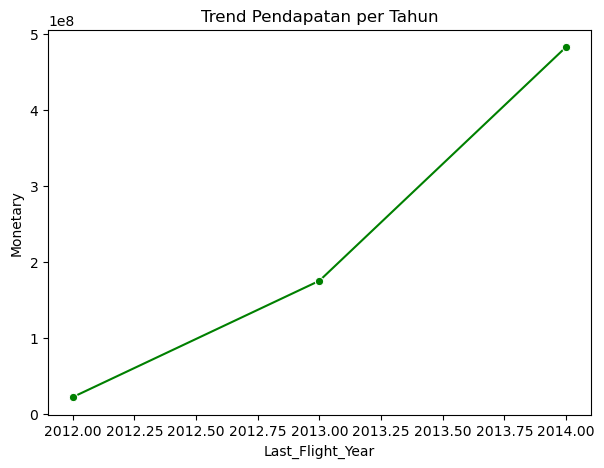

In [71]:
revenue_by_year = df.groupby("Last_Flight_Year")["Monetary"].sum().reset_index()

plt.figure(figsize=(7,5))
sns.lineplot(data=revenue_by_year, x="Last_Flight_Year", y="Monetary", marker="o", color="green")
plt.title("Trend Pendapatan per Tahun")
plt.show()

### 1. Tier/peringkat apa yang paling banyak diperoleh oleh customer ?

FFP_TIER
4    58066
5     3409
6     1513
Name: count, dtype: int64

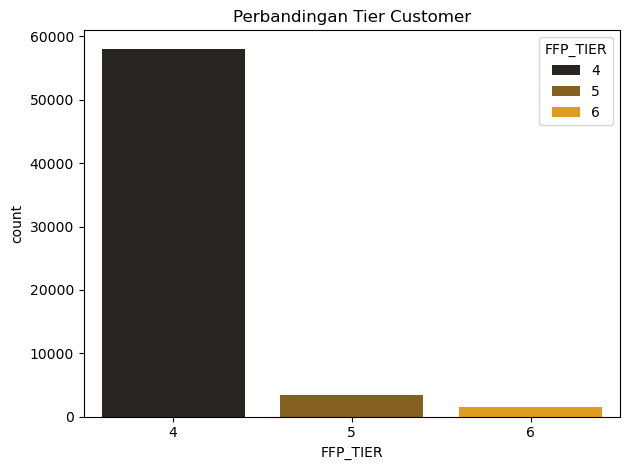

In [23]:
sns.countplot(data=df, x='FFP_TIER', hue='FFP_TIER', palette='dark:orange')
plt.title('Perbandingan Tier Customer')
plt.tight_layout()
df['FFP_TIER'].value_counts()

In [24]:
df['FLIGHT_COUNT'].describe()

count    62988.000000
mean        11.839414
std         14.049471
min          2.000000
25%          3.000000
50%          7.000000
75%         15.000000
max        213.000000
Name: FLIGHT_COUNT, dtype: float64

,FFP_TIER,FLIGHT_COUNT
0,4,9.404677
1,5,38.256380
2,6,45.758757


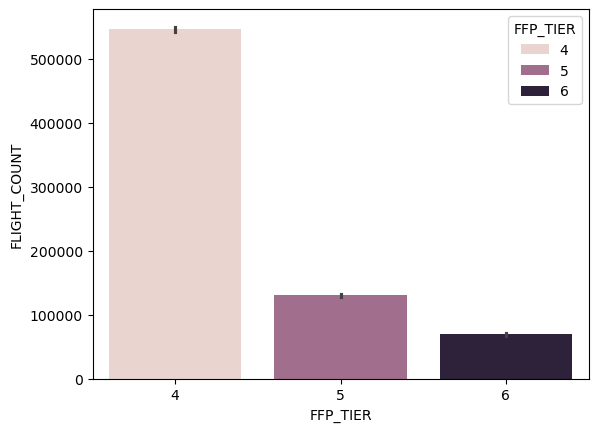

In [25]:

df_group=df.groupby('FFP_TIER')['FLIGHT_COUNT'].mean().reset_index()
sns.barplot(data=df, x='FFP_TIER',y='FLIGHT_COUNT',hue='FFP_TIER', estimator=np.sum)
df_group

,FFP_TIER,SEG_KM_SUM
0,4,13910.703096
1,5,50954.020241
2,6,64215.287508


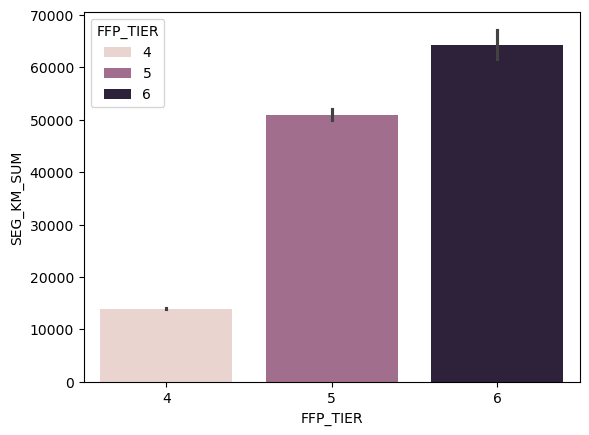

In [26]:
sns.barplot(data=df, x='FFP_TIER',y='SEG_KM_SUM',hue='FFP_TIER')
df_group_km=df.groupby('FFP_TIER')['SEG_KM_SUM'].mean().reset_index()
df_group_km


GENDER
Male      48134
Female    14851
Name: count, dtype: int64

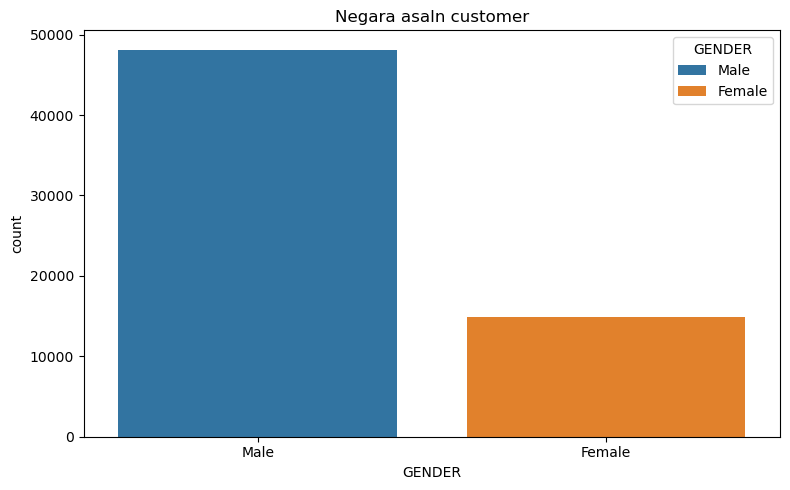

In [27]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='GENDER',hue='GENDER')
plt.title('Negara asaln customer')
plt.tight_layout()
df["GENDER"].value_counts()

   MEMBER_NO  Recency  Frequency  Monetary
0      54993      0.0        210  473748.0
1      28065      6.0        140  338917.0
2      55106     10.0        135  328600.0
3      21189     95.0         23  241850.0
4      39546      4.0        152  255262.0


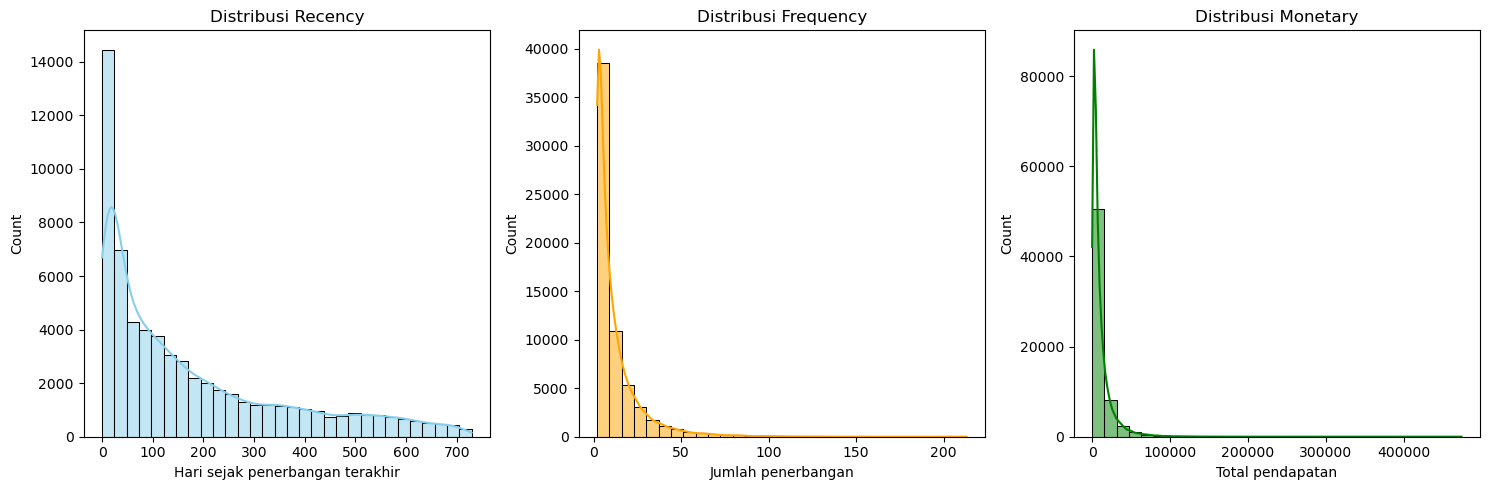

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load dataset ---
df_rfm = df.copy()

# --- 2. Konversi kolom tanggal ---
df_rfm["LAST_FLIGHT_DATE"] = pd.to_datetime(df_rfm["LAST_FLIGHT_DATE"], errors="coerce")
df_rfm["LOAD_TIME"] = pd.to_datetime(df_rfm["LOAD_TIME"], errors="coerce")

# --- 3. Hitung RFM ---
df_rfm["Recency"] = (df_rfm["LOAD_TIME"] - df_rfm["LAST_FLIGHT_DATE"]).dt.days
df_rfm["Frequency"] = df_rfm["FLIGHT_COUNT"]
df_rfm["Monetary"] = df_rfm["SUM_YR_1"].fillna(0) + df_rfm["SUM_YR_2"].fillna(0)

# --- 4. Pilih kolom RFM saja ---
df_rfm = df_rfm[["MEMBER_NO", "Recency", "Frequency", "Monetary"]]
print(df_rfm.head())

# --- 5. Plot distribusi setiap dimensi ---
plt.figure(figsize=(15, 5))

# Plot Recency
plt.subplot(1, 3, 1)
sns.histplot(df_rfm["Recency"], bins=30, kde=True, color="skyblue")
plt.title("Distribusi Recency")
plt.xlabel("Hari sejak penerbangan terakhir")

# Plot Frequency
plt.subplot(1, 3, 2)
sns.histplot(df_rfm["Frequency"], bins=30, kde=True, color="orange")
plt.title("Distribusi Frequency")
plt.xlabel("Jumlah penerbangan")

# Plot Monetary
plt.subplot(1, 3, 3)
sns.histplot(df_rfm["Monetary"], bins=30, kde=True, color="green")
plt.title("Distribusi Monetary")
plt.xlabel("Total pendapatan")

plt.tight_layout()
plt.show()


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

### Deskriptif statistic

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,31494.500000,18183.213715,1.0,15747.750000,31494.500000,47241.250000,62988.0
FFP_TIER,62988.0,4.102162,0.373856,4.0,4.000000,4.000000,4.000000,6.0
AGE,62568.0,42.476346,9.885915,6.0,35.000000,41.000000,48.000000,110.0
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.0,3.000000,7.000000,15.000000,213.0
BP_SUM,62988.0,10925.081254,16339.486151,0.0,2518.000000,5700.000000,12831.000000,505308.0
SUM_YR_1,62437.0,5355.376064,8109.450147,0.0,1003.000000,2800.000000,6574.000000,239560.0
SUM_YR_2,62850.0,5604.026014,8703.364247,0.0,780.000000,2773.000000,6845.750000,234188.0
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.0,4747.000000,9994.000000,21271.250000,580717.0
LAST_TO_END,62988.0,176.120102,183.822223,1.0,29.000000,108.000000,268.000000,731.0
AVG_INTERVAL,62988.0,67.749788,77.517866,0.0,23.370370,44.666667,82.000000,728.0


In [30]:
df.describe(include='object').T

,count,unique,top,freq
FFP_DATE,62988,3068,1/13/2011,184
FIRST_FLIGHT_DATE,62988,3406,2/16/2013,96
GENDER,62985,2,Male,48134
WORK_CITY,60719,3234,guangzhou,9386
WORK_PROVINCE,59740,1165,guangdong,17509
WORK_COUNTRY,62962,118,CN,57748
LOAD_TIME,62988,1,3/31/2014,62988
LAST_FLIGHT_DATE,62988,731,3/31/2014,959


In [31]:
null_info = (
    df.isnull().sum()
    .to_frame(name='Jumlah Null')
    .assign(Persentase_Null=lambda x: (x['Jumlah Null'] / len(df)) * 100)
    .sort_values(by='Persentase_Null', ascending=False)
)

print(null_info)

                   Jumlah Null  Persentase_Null
WORK_PROVINCE             3248         5.156538
WORK_CITY                 2269         3.602273
SUM_YR_1                   551         0.874770
AGE                        420         0.666794
SUM_YR_2                   138         0.219089
WORK_COUNTRY                26         0.041278
GENDER                       3         0.004763
FFP_TIER                     0         0.000000
MEMBER_NO                    0         0.000000
FFP_DATE                     0         0.000000
FIRST_FLIGHT_DATE            0         0.000000
FLIGHT_COUNT                 0         0.000000
LOAD_TIME                    0         0.000000
BP_SUM                       0         0.000000
SEG_KM_SUM                   0         0.000000
LAST_FLIGHT_DATE             0         0.000000
LAST_TO_END                  0         0.000000
AVG_INTERVAL                 0         0.000000
MAX_INTERVAL                 0         0.000000
EXCHANGE_COUNT               0         0

### Univaiate analisis 


In [32]:
num_col= df.select_dtypes(include=['int64','float64']).columns
obj_col = df.select_dtypes(include=['object']).columns

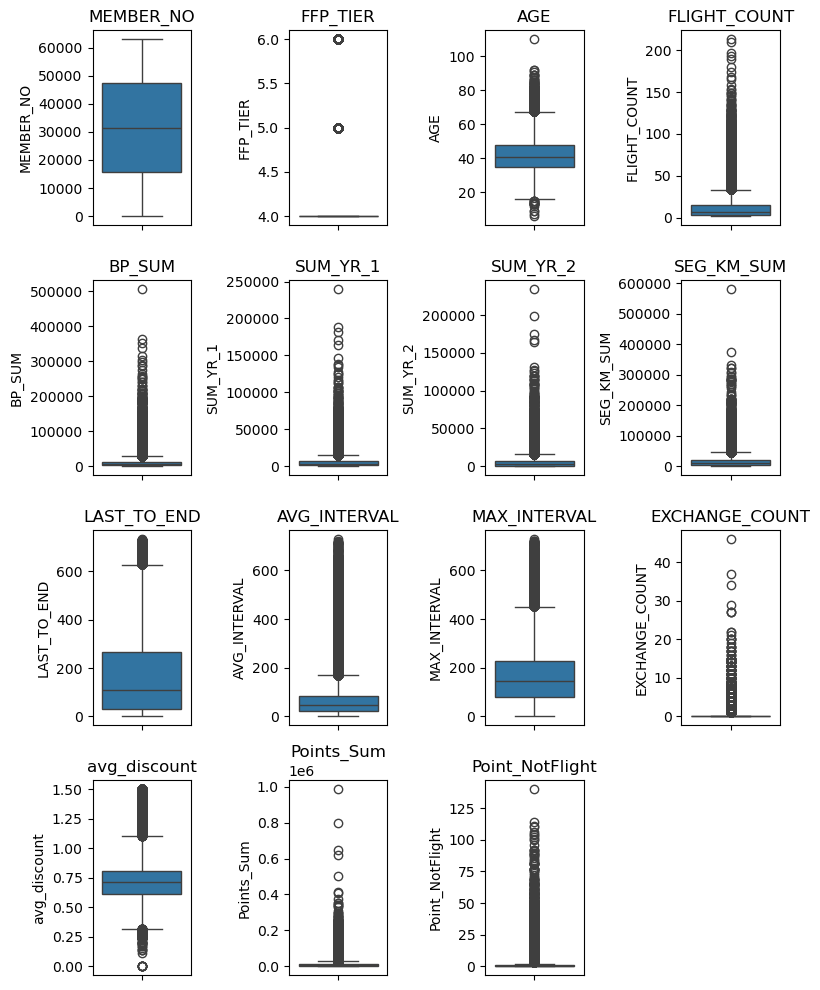

In [33]:
fig, axes = plt.subplots(nrows=int(np.ceil(len(num_col)/4)), ncols=4, figsize=(8, 10))
axes = axes.flatten()

for i, col in enumerate(num_col):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

# Hide any unused subplots
for j in range(len(num_col), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

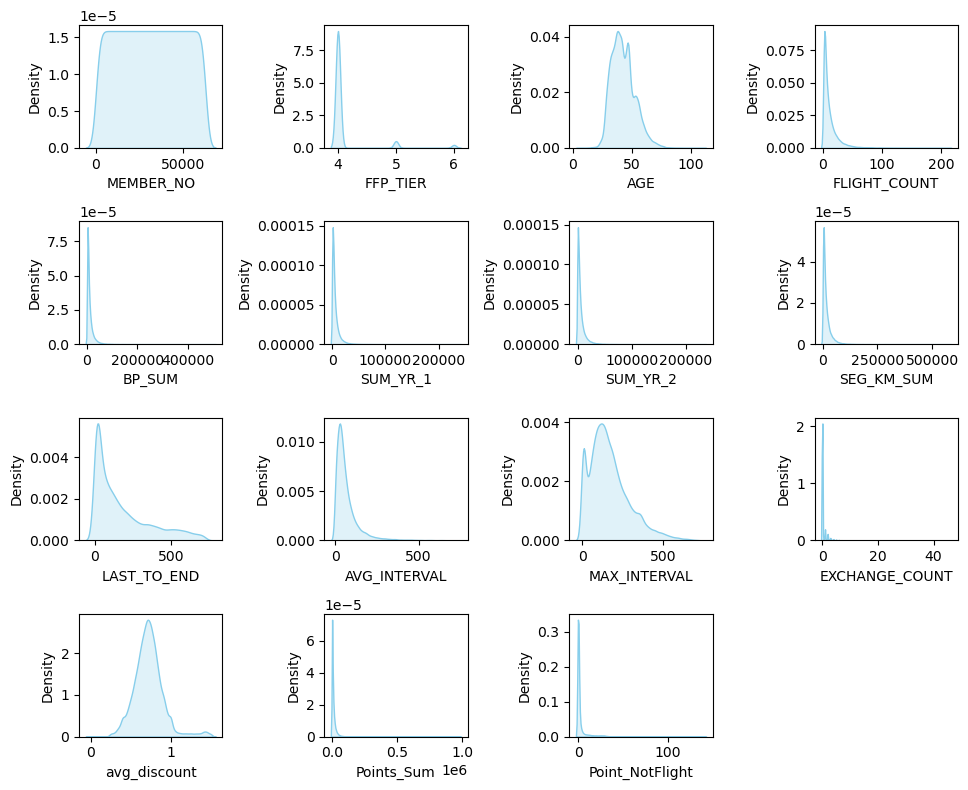

In [37]:
fig, axes = plt.subplots( nrows=int(np.ceil(len(num_col)/4)),ncols=4, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate(num_col):
    sns.kdeplot(df[col], ax=axes[i], fill=True, color='skyblue')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

for j in range(len(num_col), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

rata rata data kolom memiliki outlier

###  Multivariate Analysis

<Axes: >

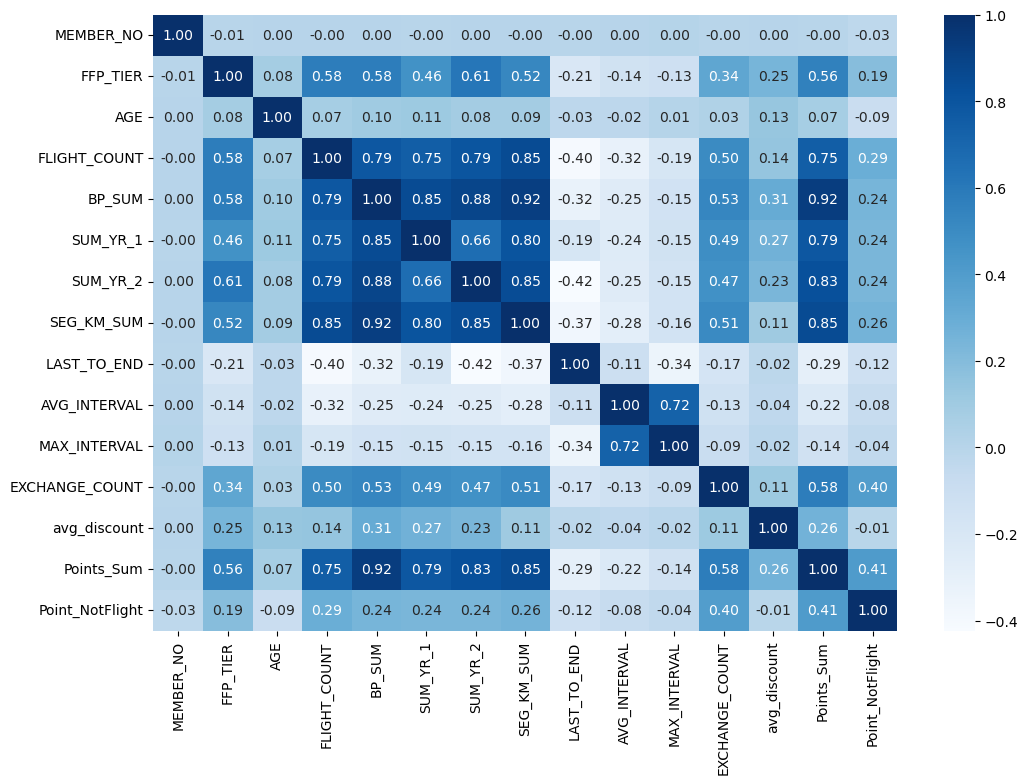

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df[num_col].corr(), cmap='Blues',annot=True, fmt='.2f')

terdapat data yang redundan yakni <b>FLIGHT_COUNT,BP_SUM, SUM_YR_1,SUM_YR_2,SEG_KM_SUM , dan Points_Sum</b>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

## Preprocessing 

### Handling missing value

In [38]:
null_info = (
    df.isnull().sum()
    .to_frame(name='Jumlah Null')
    .assign(Persentase_Null=lambda x: (x['Jumlah Null'] / len(df)) * 100)
    .sort_values(by='Persentase_Null', ascending=False)
)

print(null_info)

                   Jumlah Null  Persentase_Null
WORK_PROVINCE             3248         5.156538
WORK_CITY                 2269         3.602273
SUM_YR_1                   551         0.874770
AGE                        420         0.666794
SUM_YR_2                   138         0.219089
WORK_COUNTRY                26         0.041278
GENDER                       3         0.004763
FFP_TIER                     0         0.000000
MEMBER_NO                    0         0.000000
FFP_DATE                     0         0.000000
FIRST_FLIGHT_DATE            0         0.000000
FLIGHT_COUNT                 0         0.000000
LOAD_TIME                    0         0.000000
BP_SUM                       0         0.000000
SEG_KM_SUM                   0         0.000000
LAST_FLIGHT_DATE             0         0.000000
LAST_TO_END                  0         0.000000
AVG_INTERVAL                 0         0.000000
MAX_INTERVAL                 0         0.000000
EXCHANGE_COUNT               0         0

ada 6 kolom yang memiliki nilai null, karena presentase null masih sekitar 5% dari data makan akan dihapus  

In [42]:
df_cleaned = df.copy()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [44]:
df_cleaned = df_cleaned.dropna()

In [45]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58255 entries, 0 to 62986
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          58255 non-null  int64  
 1   FFP_DATE           58255 non-null  object 
 2   FIRST_FLIGHT_DATE  58255 non-null  object 
 3   GENDER             58255 non-null  object 
 4   FFP_TIER           58255 non-null  int64  
 5   WORK_CITY          58255 non-null  object 
 6   WORK_PROVINCE      58255 non-null  object 
 7   WORK_COUNTRY       58255 non-null  object 
 8   AGE                58255 non-null  float64
 9   LOAD_TIME          58255 non-null  object 
 10  FLIGHT_COUNT       58255 non-null  int64  
 11  BP_SUM             58255 non-null  int64  
 12  SUM_YR_1           58255 non-null  float64
 13  SUM_YR_2           58255 non-null  float64
 14  SEG_KM_SUM         58255 non-null  int64  
 15  LAST_FLIGHT_DATE   58255 non-null  object 
 16  LAST_TO_END        58255 no